<a href="https://colab.research.google.com/github/dev-nanthan/Vision_Lab2/blob/main/Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**. **Read img1.png and convert it to a grayscale image. Develop a function that will perform the spatial filtering operations below. The function should take an image and the kernel as inputs and return the filtered image. Do NOT use internal functions for this (e.g. MATLAB's imfilter function). (hint: you might need to add zero padding around the image).**

1.   Kernel 1 = (1/9)*ones(3).
2.   Kernel 2 = (1/49)*ones(7)
3.   Kernel 3 = fspecial(`average',[7,7])
4.   Kernel 4 = fspecial(`gaussian',[3,3],0.5)
5.   Kernel 5 = fspecial(`gaussian',[7,7],1.2)



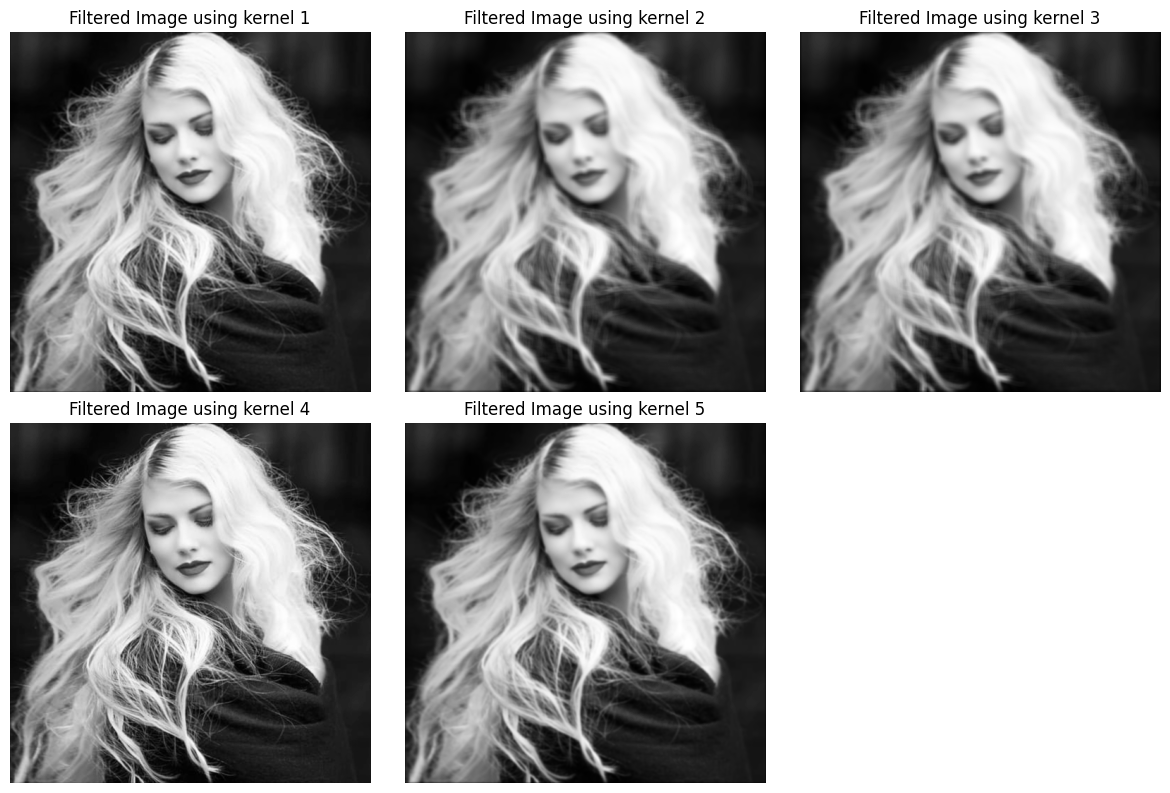

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

def convert_to_grayscale(image):
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

def apply_filter(image, kernel):
    # Get the dimensions of the kernel
    kernel_height, kernel_width = kernel.shape[:2]

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Compute the padding required for the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create an output image with the same dimensions as the input image
    filtered_image = np.zeros((height, width), dtype=np.float32)

    # Perform zero-padding on the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Apply the filter operation
    for y in range(height):
        for x in range(width):
            # Get the neighborhood of the current pixel
            neighborhood = padded_image[y:y+kernel_height, x:x+kernel_width]

            # Apply the kernel and compute the weighted sum
            filtered_value = np.sum(neighborhood * kernel)

            # Set the filtered value in the output image
            filtered_image[y, x] = filtered_value

    return filtered_image

# Read the image
image = cv2.imread('img1.png')

# Convert the image to grayscale
grayscale_image = convert_to_grayscale(image)

# Define the kernels
kernel1 = np.ones((3, 3)) / 9.0
kernel2 = np.ones((7, 7)) / 49.0
kernel3 = np.ones((7, 7)) / (7 * 7)
kernel4 = cv2.getGaussianKernel(3, 0.5) * cv2.getGaussianKernel(3, 0.5).T
kernel5 = cv2.getGaussianKernel(7, 1.2) * cv2.getGaussianKernel(7, 1.2).T

# Apply the filters
filtered_image1 = apply_filter(grayscale_image, kernel1)
filtered_image2 = apply_filter(grayscale_image, kernel2)
filtered_image3 = apply_filter(grayscale_image, kernel3)
filtered_image4 = apply_filter(grayscale_image, kernel4)
filtered_image5 = apply_filter(grayscale_image, kernel5)

# Display the filtered images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Filtered Image using kernel 1')
plt.axis('off')

plt.subplot(232)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Filtered Image using kernel 2')
plt.axis('off')

plt.subplot(233)
plt.imshow(filtered_image3, cmap='gray')
plt.title('Filtered Image using kernel 3')
plt.axis('off')

plt.subplot(234)
plt.imshow(filtered_image4, cmap='gray')
plt.title('Filtered Image using kernel 4')
plt.axis('off')

plt.subplot(235)
plt.imshow(filtered_image5, cmap='gray')
plt.title('Filtered Image using kernel 5')
plt.axis('off')


plt.tight_layout()
plt.show()


**3. Develop a function that performs median Filtering. A median filter will replace the pixel intensity with the median intensity of the pixels overlapped with the kernel. The function should take the image and the size of the kernel as inputs. Apply the following median filters to image img1.png:**

1.   Median filter with kernel size 3*3.
2.   Median filter with kernel size 5*5.


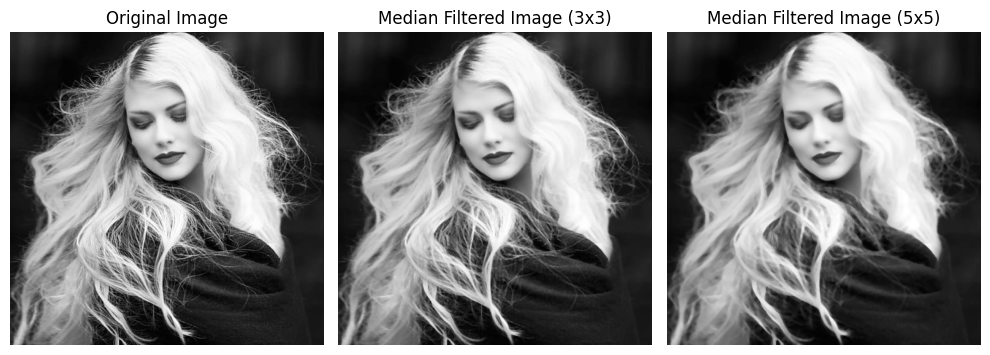

In [ ]:
def apply_median_filter(image, kernel_size):
    # Apply median filter to the image
    filtered_image = median_filter(image, size=kernel_size)

    return filtered_image

# Define the kernel sizes
kernel_size1 = 3
kernel_size2 = 5

# Apply median filtering
filtered_image1 = apply_median_filter(grayscale_image, kernel_size1)
filtered_image2 = apply_median_filter(grayscale_image, kernel_size2)

# Display the original and filtered images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Median Filtered Image (3x3)')
plt.axis('off')

plt.subplot(133)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Median Filtered Image (5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()


**4. The following kernels implement linear sharpening filters which are used to enhance the edges in images. Use the function developed in step 2 and apply the filters to image img2.png.**

1.   Kernel 6 = [
                 [-1, 0, 1],
                 [-2, 0, 2],
                 [-1, 0, 1]]
2.   Kernel 7 = [
                 [-1, -2, -1],
                 [0,   0,  0],
                 [1,   2,  1]]

3.   Kernel 8 = fspecial(`log',3);


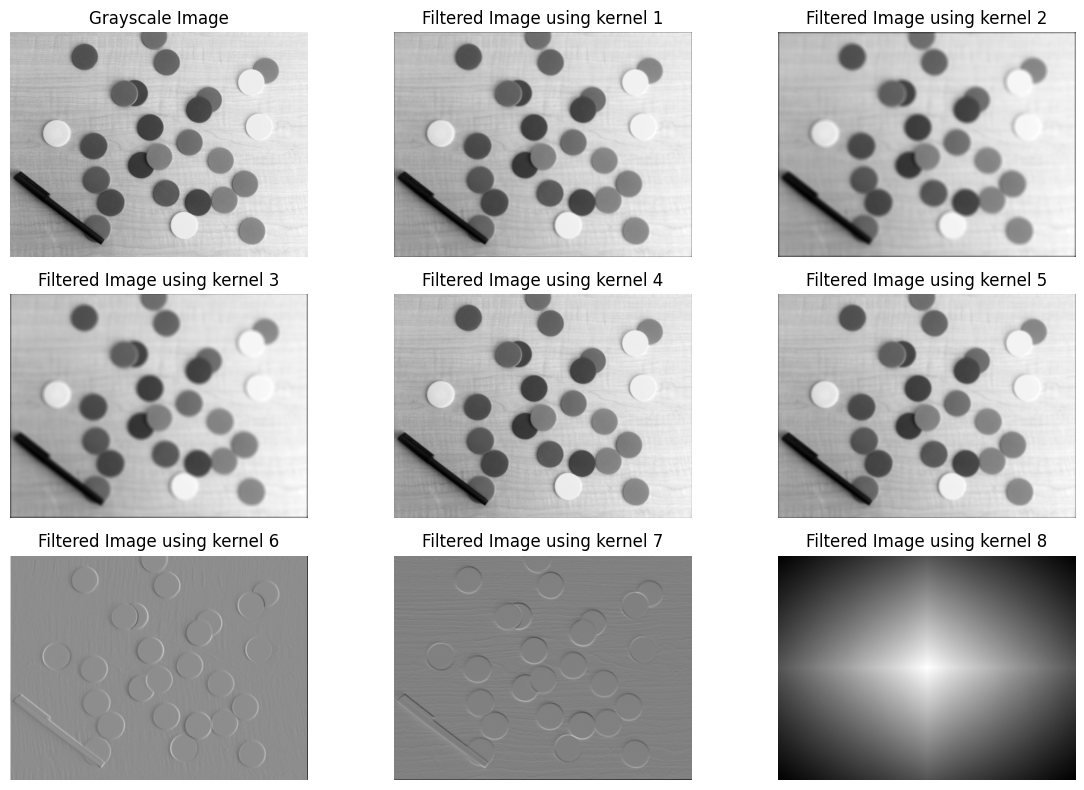

In [29]:
# Read the image
image = cv2.imread('img2.png')

# Convert the image to grayscale
grayscale_image = convert_to_grayscale(image)

# Define the kernels
kernel6 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel7 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel8 = cv2.filter2D(grayscale_image, -1, cv2.getGaussianKernel(3, 1))

# Apply the filters
filtered_image1 = apply_filter(grayscale_image, kernel1)
filtered_image2 = apply_filter(grayscale_image, kernel2)
filtered_image3 = apply_filter(grayscale_image, kernel3)
filtered_image4 = apply_filter(grayscale_image, kernel4)
filtered_image5 = apply_filter(grayscale_image, kernel5)
filtered_image6 = apply_filter(grayscale_image, kernel6)
filtered_image7 = apply_filter(grayscale_image, kernel7)
filtered_image8 = apply_filter(grayscale_image, kernel8)

# Display the original and filtered images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(331)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(332)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Filtered Image using kernel 1')
plt.axis('off')

plt.subplot(333)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Filtered Image using kernel 2')
plt.axis('off')

plt.subplot(334)
plt.imshow(filtered_image3, cmap='gray')
plt.title('Filtered Image using kernel 3')
plt.axis('off')

plt.subplot(335)
plt.imshow(filtered_image4, cmap='gray')
plt.title('Filtered Image using kernel 4')
plt.axis('off')

plt.subplot(336)
plt.imshow(filtered_image5, cmap='gray')
plt.title('Filtered Image using kernel 5')
plt.axis('off')

plt.subplot(337)
plt.imshow(filtered_image6, cmap='gray')
plt.title('Filtered Image using kernel 6')
plt.axis('off')

plt.subplot(338)
plt.imshow(filtered_image7, cmap='gray')
plt.title('Filtered Image using kernel 7')
plt.axis('off')

plt.subplot(339)
plt.imshow(filtered_image8, cmap='gray')
plt.title('Filtered Image using kernel 8')
plt.axis('off')

plt.tight_layout()
plt.show()
